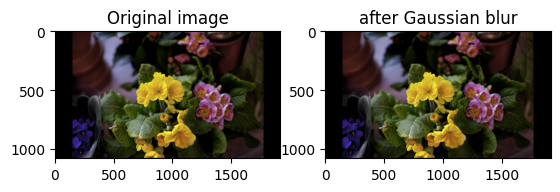

In [100]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

x = 1920
y = 1080

img = cv2.imread(r'../datasets/real-world/MIT-Adobe-5k/a1251-_DGW6263.jpg')
if img.shape[0]/y > img.shape[1]/x:
    # Scale to Y
    dim = (int((y/img.shape[0])*img.shape[1]), y)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_LANCZOS4)
else:
    # Scale to X
    dim = (x, int((x/img.shape[1])*img.shape[0]))
    img = cv2.resize(img, dim, interpolation=cv2.INTER_LANCZOS4)
horizontal = int((x - img.shape[1])/2)
veritcal = int((y - img.shape[0])/2)
img = cv2.copyMakeBorder(img, veritcal, veritcal, horizontal, horizontal, cv2.BORDER_CONSTANT)
# gaussian smoothing
blurred=cv2.GaussianBlur(img,(5, 5),1.4) 
f,(ax1, ax2) = plt.subplots(1,2)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.imshow(RGB_img)
ax1.title.set_text("Original image")
RGB_blurred = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax2.imshow(RGB_blurred)
ax2.title.set_text("after Gaussian blur")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


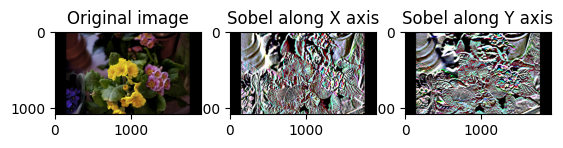

In [101]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
f, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(RGB_img)
ax1.title.set_text("Original image")
ax2.imshow(sobelx)
ax2.title.set_text("Sobel along X axis")
ax3.imshow(sobely)
ax3.title.set_text("Sobel along Y axis")

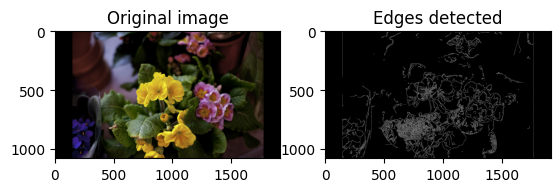

In [102]:
canny = cv2.Canny(img,30,100)
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(RGB_img)
ax1.title.set_text("Original image")
ax2.imshow(canny,cmap='gray')
ax2.title.set_text("Edges detected")

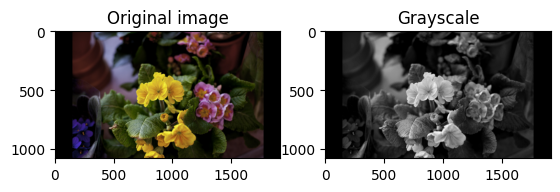

In [103]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f,(ax1, ax2) = plt.subplots(1,2)
ax1.imshow(RGB_img)
ax1.title.set_text("Original image")
ax2.imshow(gray, cmap='gray')
ax2.title.set_text("Grayscale")

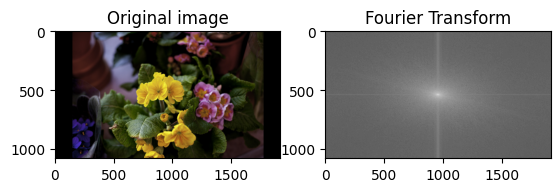

In [104]:
dft = cv2.dft(np.float32(gray),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
f,(ax1, ax2) = plt.subplots(1,2)
ax1.imshow(RGB_img)
ax1.title.set_text("Original image")
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text("Fourier Transform")

Mean Saturation:  125.32114478991758
Saturation Variance:  7216.658280630278


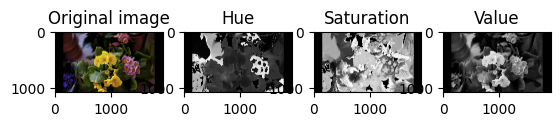

In [105]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
f,(ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.imshow(RGB_img)
ax1.title.set_text("Original image")
ax2.imshow(hsv[:,:,0],cmap='gray')
ax2.title.set_text("Hue")
ax3.imshow(hsv[:,:,1],cmap='gray')
ax3.title.set_text("Saturation")
ax4.imshow(hsv[:,:,2],cmap='gray')
ax4.title.set_text("Value")

print('Mean Saturation: ', hsv[:,:,1].mean())
print('Saturation Variance: ', hsv[:,:,1].var())

Mean Saturation:  101.20691187539806
Saturation Variance:  6141.223422301058


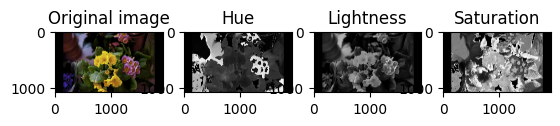

In [106]:
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
f,(ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.imshow(RGB_img)
ax1.title.set_text("Original image")
ax2.imshow(hls[:,:,0],cmap='gray')
ax2.title.set_text("Hue")
ax3.imshow(hls[:,:,1],cmap='gray')
ax3.title.set_text("Lightness")
ax4.imshow(hls[:,:,2],cmap='gray')
ax4.title.set_text("Saturation")

print('Mean Saturation: ', hls[:,:,2].mean())
print('Saturation Variance: ', hls[:,:,2].var())